In [2]:
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]

In [12]:
# Baseline: independent search
baseline_folder = r"E:\data\gst-0815-23\Socialization_partial_solution\Independent_Heatmap_2"
alpha_list = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40]
g_ave_performance_across_K_alpha, g_best_performance_across_K_alpha, g_variance_across_K_alpha = [], [], []
s_ave_performance_across_K_alpha, s_best_performance_across_K_alpha, s_variance_across_K_alpha = [], [], []
for alpha in alpha_list:
    g_ave_performance_file = baseline_folder + r"\g_ave_performance_across_K_alpha_{0}".format(alpha)
    g_best_performance_file = baseline_folder + r"\g_best_performance_across_K_alpha_{0}".format(alpha)
    g_variance_file = baseline_folder + r"\g_variance_across_K_alpha_{0}".format(alpha)
    
    s_ave_performance_file = baseline_folder + r"\s_ave_performance_across_K_alpha_{0}".format(alpha)
    s_best_performance_file = baseline_folder + r"\s_best_performance_across_K_alpha_{0}".format(alpha)
    s_variance_file = baseline_folder + r"\s_variance_across_K_alpha_{0}".format(alpha)

    with open(g_ave_performance_file, 'rb') as infile:
        g_ave_performance = pickle.load(infile)
    with open(g_best_performance_file, 'rb') as infile:
        g_best_performance = pickle.load(infile)
    with open(g_variance_file, 'rb') as infile:
        g_variance = pickle.load(infile)
    g_ave_performance_across_K_alpha.append(g_ave_performance)
    g_best_performance_across_K_alpha.append(g_best_performance)
    g_variance_across_K_alpha.append(g_variance)
    
    with open(s_ave_performance_file, 'rb') as infile:
        s_ave_performance = pickle.load(infile)
    with open(s_best_performance_file, 'rb') as infile:
        s_best_performance = pickle.load(infile)
    with open(s_variance_file, 'rb') as infile:
        s_variance = pickle.load(infile)
    s_ave_performance_across_K_alpha.append(s_ave_performance)
    s_best_performance_across_K_alpha.append(s_best_performance)
    s_variance_across_K_alpha.append(s_variance)

# print(np.array(s_ave_performance_across_K_alpha).shape)
# print(s_ave_performance_across_K_alpha)
g_baseline_across_K = g_ave_performance_across_K_alpha[1]
print(g_baseline_across_K)

[0.770014998951251, 0.7337106381494419, 0.7172615163069787, 0.7095023950804814, 0.6994799566001885, 0.694745380400336, 0.6894729297873474, 0.6813102274308724, 0.6764132873167944]


In [13]:
data_folder = r"E:\data\gst-0815-23\Hyper-parameters\EvaluatingForwardBackward_3_GGGS"
# GG
roll_forward_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
roll_back_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

heatmap_1, heatmap_2, heatmap_3 = [], [], []
variance_heatmap_1, variance_heatmap_2, variance_heatmap_3 = [], [], []
unique_diversity_heatmap_1, unique_diversity_heatmap_2, unique_diversity_heatmap_3 = [], [], []
pair_wise_diversity_heatmap_1, pair_wise_diversity_heatmap_2, pair_wise_diversity_heatmap_3 = [], [], []
for roll_forward in roll_forward_list:
    row_heatmap_1, row_heatmap_2, row_heatmap_3 = [], [], []
    row_variance_1, row_variance_2, row_variance_3 = [], [], []
    row_unique_1, row_unique_2, row_unique_3 = [], [], []
    row_pair_wise_1, row_pair_wise_2, row_pair_wise_3 = [], [], []
    for roll_back in roll_back_list:
        # gg_fitness, gg_variance, gg_fitness_across_time = [], [], []
        gg_performance_file = data_folder + r"\gg_performance_across_K_forward_{0}_backward_{1}".format(roll_forward, roll_back)
        gg_variance_file = data_folder + r"\gg_variance_across_K_forward_{0}_backward_{1}".format(roll_forward, roll_back)
        gg_unique_diversity_file = data_folder + r"\gg_unique_diversity_across_K_forward_{0}_backward_{1}".format(roll_forward, roll_back)
        gg_pair_wise_diversity_file = data_folder + r"\gg_pair_wise_diversity_across_K_forward_{0}_backward_{1}".format(roll_forward, roll_back)
        # GG
        with open(gg_performance_file, 'rb') as infile:
            gg_fitness = pickle.load(infile)
        with open(gg_variance_file, 'rb') as infile:
            gg_variance = pickle.load(infile)
        with open(gg_unique_diversity_file, 'rb') as infile:
            gg_unique_diversity = pickle.load(infile)
        with open(gg_pair_wise_diversity_file, 'rb') as infile:
            gg_pair_wise_diversity = pickle.load(infile)
        row_heatmap_1.append(gg_fitness[0])
        row_heatmap_2.append(gg_fitness[1])
        row_heatmap_3.append(gg_fitness[2])
        
        row_variance_1.append(gg_variance[0])
        row_variance_2.append(gg_variance[1])
        row_variance_3.append(gg_variance[2])
        
        row_unique_1.append(gg_unique_diversity[0])
        row_unique_2.append(gg_unique_diversity[1])
        row_unique_3.append(gg_unique_diversity[2])
        
        row_pair_wise_1.append(gg_pair_wise_diversity[0])
        row_pair_wise_2.append(gg_pair_wise_diversity[1])
        row_pair_wise_3.append(gg_pair_wise_diversity[2])
    heatmap_1.append(row_heatmap_1)
    heatmap_2.append(row_heatmap_2)
    heatmap_3.append(row_heatmap_3)
    
    variance_heatmap_1.append(row_variance_1)
    variance_heatmap_2.append(row_variance_2)
    variance_heatmap_3.append(row_variance_3)
    
    unique_diversity_heatmap_1.append(row_unique_1)
    unique_diversity_heatmap_2.append(row_unique_2)
    unique_diversity_heatmap_3.append(row_unique_3)
    
    pair_wise_diversity_heatmap_1.append(row_pair_wise_1)
    pair_wise_diversity_heatmap_2.append(row_pair_wise_2)
    pair_wise_diversity_heatmap_3.append(row_pair_wise_3)
        
print(len(heatmap_1))
print(len(heatmap_1[0]))
print(heatmap_1[0]) # across roll_back

result_folder = r"E:\data\gst-0815-23\Hyper-parameters\Evaluating_Results_3"

10
10
[0.7119240301522235, 0.7062427527671694, 0.7082297776998452, 0.7082532774592509, 0.7111847292531257, 0.7061907498834712, 0.7103823636997357, 0.7045750551051673, 0.7068932999637234, 0.7054305701531711]


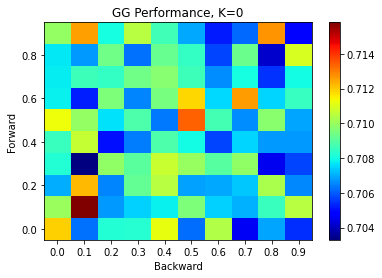

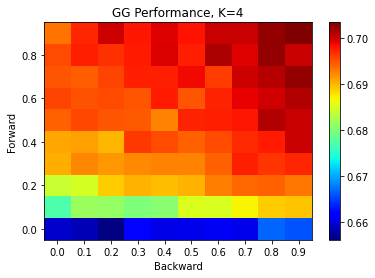

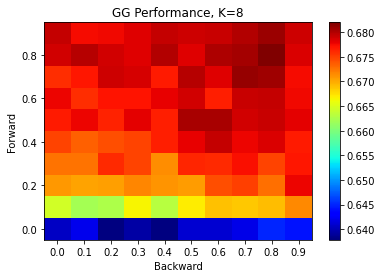

In [14]:
# Average Performance
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
x = roll_back_list
y = roll_forward_list
X, Y = np.meshgrid(x, y)     # Create a grid of x and y values
gg_fitness_across_xy = np.array(heatmap_1)
z = gg_fitness_across_xy
# Create the 2D color plot
plt.pcolormesh(x, y, z, cmap='jet')
plt.colorbar()  # Add a colorbar for reference

# Set the axis labels and title
plt.xlabel('Backward')
plt.xticks(x)
# plt.yticks(y)
plt.ylabel('Forward')
plt.title('GG Performance, K=0')
plt.savefig(result_folder + r"\GG_performance_colored_K=0.png", transparent=True, dpi=300)
# Display the plot
plt.show()

# # heatmap figure to replace the 3D surface
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
x = roll_back_list
y = roll_forward_list
X, Y = np.meshgrid(x, y)     # Create a grid of x and y values
gg_fitness_across_xy = np.array(heatmap_2)
z = gg_fitness_across_xy
# Create the 2D color plot
plt.pcolormesh(x, y, z, cmap='jet')
plt.colorbar()  # Add a colorbar for reference

# Set the axis labels and title
plt.xlabel('Backward')
plt.xticks(x)
# plt.yticks(y)
plt.ylabel('Forward')
plt.title('GG Performance, K=4')
plt.savefig(result_folder + r"\GG_performance_colored_K=4.png", transparent=True, dpi=300)
# Display the plot
plt.show()

# # heatmap figure to replace the 3D surface
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
x = roll_back_list
y = roll_forward_list
X, Y = np.meshgrid(x, y)     # Create a grid of x and y values
gg_fitness_across_xy = np.array(heatmap_3)
z = gg_fitness_across_xy
# Create the 2D color plot
plt.pcolormesh(x, y, z, cmap='jet')
plt.colorbar()  # Add a colorbar for reference

# Set the axis labels and title
plt.xlabel('Backward')
plt.xticks(x)
# plt.yticks(y)
plt.ylabel('Forward')
plt.title('GG Performance, K=8')
plt.savefig(result_folder + r"\GG_performance_colored_K=8.png", transparent=True, dpi=300)
# Display the plot
plt.show()

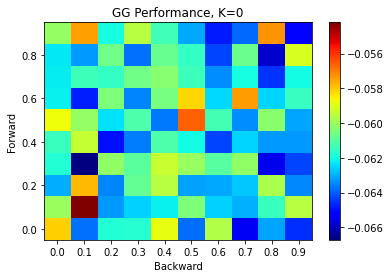

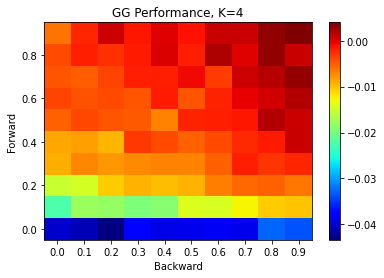

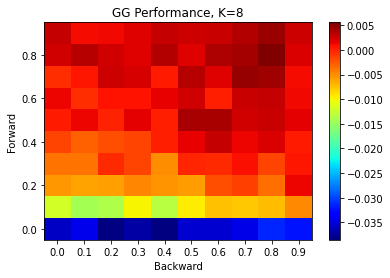

In [15]:
# Average Difference
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
x = roll_back_list
y = roll_forward_list
X, Y = np.meshgrid(x, y)     # Create a grid of x and y values
gg_fitness_across_xy = np.array(heatmap_1)
z = gg_fitness_across_xy - g_baseline_across_K[0]
# Create the 2D color plot
plt.pcolormesh(x, y, z, cmap='jet')
plt.colorbar()  # Add a colorbar for reference

# Set the axis labels and title
plt.xlabel('Backward')
plt.xticks(x)
# plt.yticks(y)
plt.ylabel('Forward')
plt.title('GG Performance, K=0')
plt.savefig(result_folder + r"\GG_diff_performance_colored_K=0.png", transparent=True, dpi=300)
# Display the plot
plt.show()

# # heatmap figure to replace the 3D surface
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
x = roll_back_list
y = roll_forward_list
X, Y = np.meshgrid(x, y)     # Create a grid of x and y values
gg_fitness_across_xy = np.array(heatmap_2)
z = gg_fitness_across_xy - g_baseline_across_K[4]
# Create the 2D color plot
plt.pcolormesh(x, y, z, cmap='jet')
plt.colorbar()  # Add a colorbar for reference

# Set the axis labels and title
plt.xlabel('Backward')
plt.xticks(x)
# plt.yticks(y)
plt.ylabel('Forward')
plt.title('GG Performance, K=4')
plt.savefig(result_folder + r"\GG_diff_performance_colored_K=4.png", transparent=True, dpi=300)
# Display the plot
plt.show()

# # heatmap figure to replace the 3D surface
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
x = roll_back_list
y = roll_forward_list
X, Y = np.meshgrid(x, y)     # Create a grid of x and y values
gg_fitness_across_xy = np.array(heatmap_3)
z = gg_fitness_across_xy - g_baseline_across_K[8]
# Create the 2D color plot
plt.pcolormesh(x, y, z, cmap='jet')
plt.colorbar()  # Add a colorbar for reference

# Set the axis labels and title
plt.xlabel('Backward')
plt.xticks(x)
# plt.yticks(y)
plt.ylabel('Forward')
plt.title('GG Performance, K=8')
plt.savefig(result_folder + r"\GG_diff_performance_colored_K=8.png", transparent=True, dpi=300)
# Display the plot
plt.show()

In [8]:
# # Unique Diversity
# import numpy as np
# import matplotlib.pyplot as plt
# 
# # Generate some sample data
# x = roll_back_list
# y = roll_forward_list
# X, Y = np.meshgrid(x, y)     # Create a grid of x and y values
# z = np.array(unique_diversity_heatmap_1)
# # Create the 2D color plot
# plt.pcolormesh(x, y, z, cmap='jet')
# plt.colorbar()  # Add a colorbar for reference
# 
# # Set the axis labels and title
# plt.xlabel('Backward')
# plt.xticks(x)
# # plt.yticks(y)
# plt.ylabel('Forward')
# plt.title('GG Performance K=0')
# plt.savefig(result_folder + r"\GG_unique_diversity_colored_K=0.png", transparent=True, dpi=300)
# # Display the plot
# plt.show()
# 
# # Variance
# import numpy as np
# import matplotlib.pyplot as plt
# 
# # Generate some sample data
# x = roll_back_list
# y = roll_forward_list
# X, Y = np.meshgrid(x, y)     # Create a grid of x and y values
# z = np.array(unique_diversity_heatmap_2)
# # Create the 2D color plot
# plt.pcolormesh(x, y, z, cmap='jet')
# plt.colorbar()  # Add a colorbar for reference
# 
# # Set the axis labels and title
# plt.xlabel('Backward')
# plt.xticks(x)
# # plt.yticks(y)
# plt.ylabel('Forward')
# plt.title('GG Performance K=0')
# plt.savefig(result_folder + r"\GG_unique_diversity_colored_K=4.png", transparent=True, dpi=300)
# # Display the plot
# plt.show()
# 
# # Variance
# import numpy as np
# import matplotlib.pyplot as plt
# 
# # Generate some sample data
# x = roll_back_list
# y = roll_forward_list
# X, Y = np.meshgrid(x, y)     # Create a grid of x and y values
# z = np.array(unique_diversity_heatmap_3)
# # Create the 2D color plot
# plt.pcolormesh(x, y, z, cmap='jet')
# plt.colorbar()  # Add a colorbar for reference
# 
# # Set the axis labels and title
# plt.xlabel('Backward')
# plt.xticks(x)
# # plt.yticks(y)
# plt.ylabel('Forward')
# plt.title('GG Performance K=0')
# plt.savefig(result_folder + r"\GG_unique_diversity_colored_K=8.png", transparent=True, dpi=300)
# # Display the plot
# plt.show()

In [7]:
# # Pair Wise Diversity
# import numpy as np
# import matplotlib.pyplot as plt
# 
# # Generate some sample data
# x = roll_back_list
# y = roll_forward_list
# X, Y = np.meshgrid(x, y)     # Create a grid of x and y values
# z = np.array(pair_wise_diversity_heatmap_1)
# # Create the 2D color plot
# plt.pcolormesh(x, y, z, cmap='jet')
# plt.colorbar()  # Add a colorbar for reference
# 
# # Set the axis labels and title
# plt.xlabel('Backward')
# plt.xticks(x)
# # plt.yticks(y)
# plt.ylabel('Forward')
# plt.title('GG Performance K=0')
# plt.savefig(result_folder + r"\GG_pair_diversity_colored_K=0.png", transparent=True, dpi=300)
# # Display the plot
# plt.show()
# 
# # Variance
# import numpy as np
# import matplotlib.pyplot as plt
# 
# # Generate some sample data
# x = roll_back_list
# y = roll_forward_list
# X, Y = np.meshgrid(x, y)     # Create a grid of x and y values
# z = np.array(pair_wise_diversity_heatmap_2)
# # Create the 2D color plot
# plt.pcolormesh(x, y, z, cmap='jet')
# plt.colorbar()  # Add a colorbar for reference
# 
# # Set the axis labels and title
# plt.xlabel('Backward')
# plt.xticks(x)
# # plt.yticks(y)
# plt.ylabel('Forward')
# plt.title('GG Performance K=0')
# plt.savefig(result_folder + r"\GG_pair_wise_diversity_colored_K=4.png", transparent=True, dpi=300)
# # Display the plot
# plt.show()
# 
# # Variance
# import numpy as np
# import matplotlib.pyplot as plt
# 
# # Generate some sample data
# x = roll_back_list
# y = roll_forward_list
# X, Y = np.meshgrid(x, y)     # Create a grid of x and y values
# z = np.array(pair_wise_diversity_heatmap_3)
# # Create the 2D color plot
# plt.pcolormesh(x, y, z, cmap='jet')
# plt.colorbar()  # Add a colorbar for reference
# 
# # Set the axis labels and title
# plt.xlabel('Backward')
# plt.xticks(x)
# # plt.yticks(y)
# plt.ylabel('Forward')
# plt.title('GG Performance K=0')
# plt.savefig(result_folder + r"\GG_pair_wise_diversity_colored_K=8.png", transparent=True, dpi=300)
# # Display the plot
# plt.show()